In [1]:
print("Importing packages")
from pycbc import distributions
from pycbc.waveform import get_td_waveform, td_approximants
from pycbc.detector import Detector
import matplotlib.pyplot as plt
import numpy as np
import gwpy
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv
print("Packages Imported")

Importing packages
Packages Imported


In [2]:

print("Generated Binary Mass Distributions for BBH")
# We can make pairs of distributions together, instead of apart.
bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=5000)

Generated Binary Mass Distributions for BBH


In [3]:
from pycbc import frame
#import random-
#from numpy import random
print("Using Binary Mass Distributions to generate BBH waveforms")
print("Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...")
for i in tqdm(range(len(bbh_two_mass_samples))):
    hp, hc = get_td_waveform(approximant="SEOBNRv2",                                # what are hp and hc?
                         mass1=bbh_two_mass_samples[i][0],
                         mass2=bbh_two_mass_samples[i][1],
                         delta_t=1.0/4096,
                         f_lower=40)                                                # change to 40 Hz

    noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=4096)    # did not understand clearly    # try scale = 1 
    noise= noise*1e-18
    st = np.random.randint(0,2)
    #st = round(st,0)
    #hp.save("bbh_template_4k/bbh_4k_"+str(i+1)+".txt")
    #frame.write_frame("bbh_template_4k/bbh_4k_"+str(i+1)+".gwf", , hp)
    #pylab.plot(hp.sample_times, hp, label='H1')
    #pylab.plot(noise)
    signal = TimeSeries.from_pycbc(hp)
    
    signal.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/bbh_signal/bbh_4k_"+str(i)+".txt")
    noise.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/noise_templates/noise_4k_"+str(i)+".txt")
    #print(st)
    
    signal.t0 = st
    data = noise.inject(signal)
    #pylab.plot(data)
    data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bbh_noise_signal/merged_noise_signal_"+str(i)+".txt")

#pylab.ylabel('Strain')
#pylab.xlabel('Time (s)')
#pylab.legend()
#pylab.show()

Using Binary Mass Distributions to generate BBH waveforms
Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...


  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
# MERGING NOISE + SIgnal Templates into single file


#for i in tqdm(range(5)):
path = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bbh_noise_signal/"
files= os.listdir(path)
f = open('/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/Final_BBH_Merged_Noise_Signal_Reduced_No_ABS.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

In [5]:
# MERGING NOISE Templates into single file

path_1 = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/noise_templates/"
files_1= os.listdir(path_1)
f1 = open('/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/Final_Merged_Noise_Reduced_No_Abs.csv', 'w')
cw_1 = csv.writer(f1)

for i in tqdm(files_1):
    #print(files)
    df = pd.read_csv(path_1+i,sep = ' ', header=None)
    c = df[:][1]
    cw_1.writerow(c)
f1.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [6]:
# MERGING SIGNAL Templates into single file

path_1 = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/bbh_signal/"
files_1= os.listdir(path_1)
f1 = open('/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/Final_Merged_bbh_Signal_Reduced_No_Abs.csv', 'w')
cw_1 = csv.writer(f1)

for i in tqdm(files_1):
    #print(files)
    df = pd.read_csv(path_1+i,sep = ' ', header=None)
    c = df[:][1]
    cw_1.writerow(c)
f1.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
##################################################################################################################################
##################################################################################################################################
#### DATASET DEBUGGING START

In [47]:
a = np.random.normal(scale=.1, size=16384)      #scale is standard deviation. Why is scale = 0.1?
print(a, a.shape, np.mean(a), np.std(a))

[-0.03481004 -0.1573285  -0.03588541 ...  0.29257373 -0.22882417
 -0.03254228] (16384,) -0.0004905901478320436 0.10046086731221407


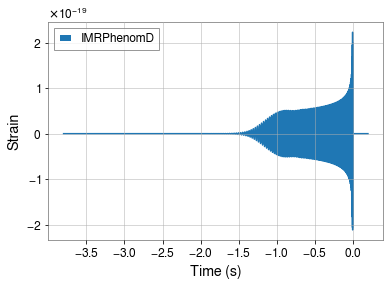

In [53]:
for apx in ['IMRPhenomD']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 spin1z=0.9,
                                 delta_t=1.0/4096,
                                 f_lower=40)

    plt.plot(hp.sample_times, hp, label=apx)

plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

1.0034967205097272 1.6937578008434009


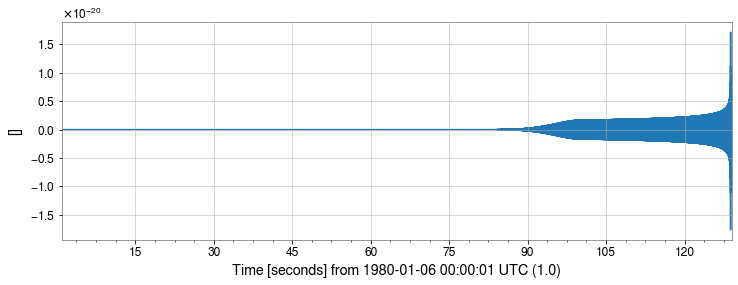

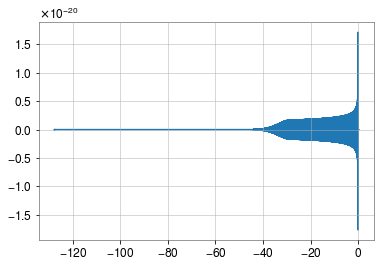

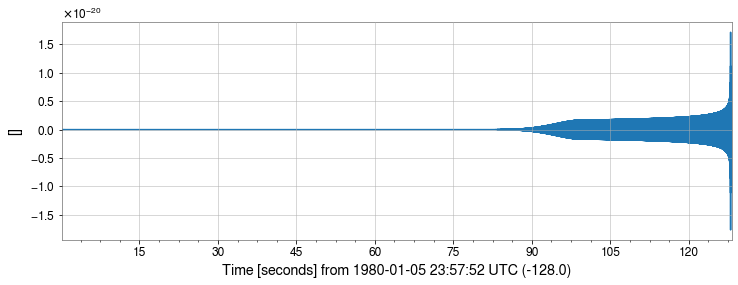

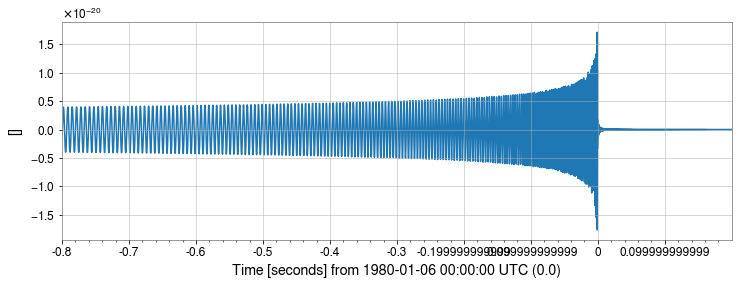

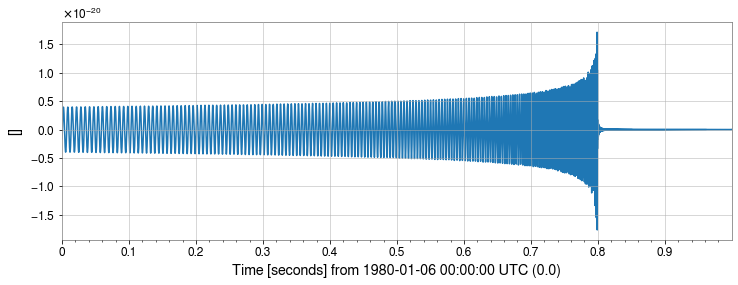

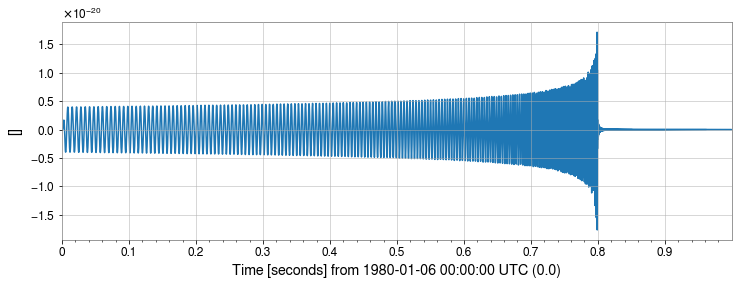

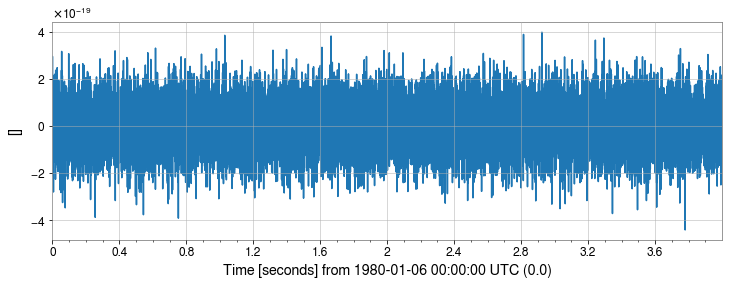

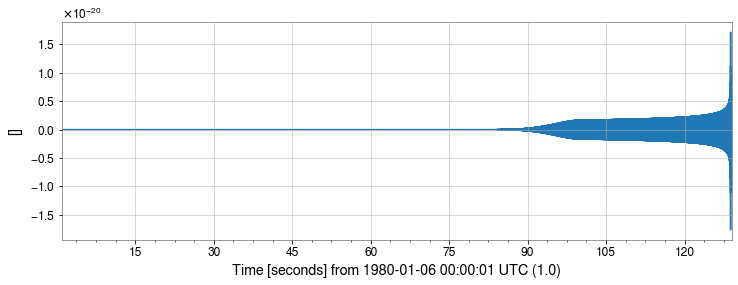

In [2]:
# This code cell shows the major time duration difference between the BNS signal and the noise.
# The noise is only 4 secs long but the BNS signal durartion varies from 120s - 60s as shown in the plots below.
# When the BNS signal is injected in the noise, only it's first 4 secs are taken which is a flatline, i.e. it has no signal
# This code cell can also extract the last 't' secs of the BNS signal and then inject into the noise
# This code cell also demonstrates tapering, which is used to prevent the "ringing" problem
####### important: Notice the major difference in the amplitude of the noise and the BNS signal. Do something about it.


bns_two_mass_distributions = distributions.Uniform(mass1=(1, 2),
                                               mass2=(1, 2))

bns_two_mass_samples = bns_two_mass_distributions.rvs(size=1)
print(bns_two_mass_samples[0][0], bns_two_mass_samples[0][1])

hp, hc = get_td_waveform(approximant='IMRPhenomPv2_NRTidal',
                                mass1=bns_two_mass_samples[0][0],
                                mass2=bns_two_mass_samples[0][1],
                                delta_t=1.0/4096,
                                f_lower=40)

# plt.plot(hp.sample_times, hp, label='IMRPhenomPv2_NRTidal')

# plt.ylabel('Strain')
# plt.xlabel('Time (s)')
# plt.legend()
# plt.show()

# hp.plot()
t = hp.get_end_time()
hp1 = hp.time_slice(t-1, t)

signal = TimeSeries.from_pycbc(hp)
signal1 = TimeSeries.from_pycbc(hp1)

signal.plot()

# signal.t0 = 1

# signal.plot()

# noise = TimeSeries(np.random.normal(scale=1, size=16384), sample_rate=4096)
# noise *= 1e-18

# data = noise.inject(signal)
# data.plot()


signal1.plot()

signal1.t0 = 1

signal1.plot()


signal1 = signal1.taper()
signal1.plot()

noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=4096)
noise *= 1e-18

data = noise.inject(signal1)
data.plot()


[(49.07843377, 25.42974655)]


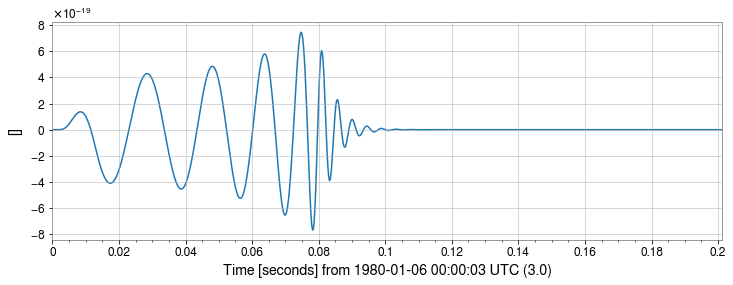

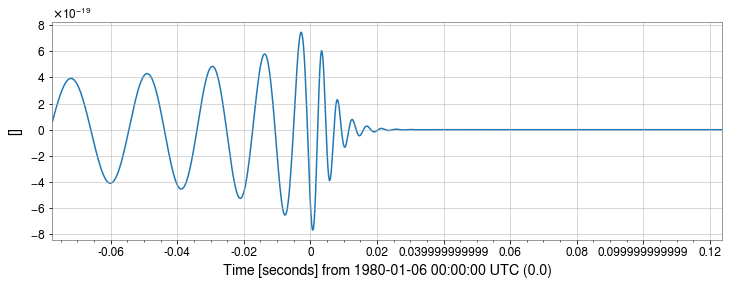

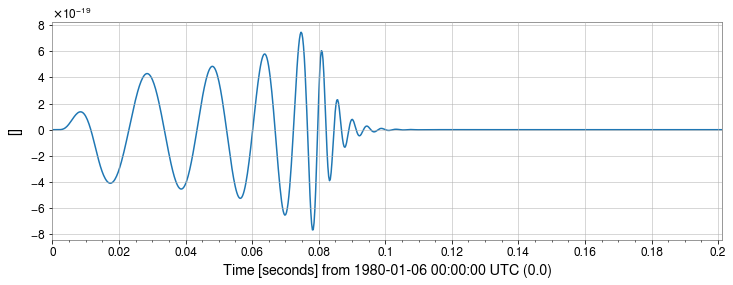

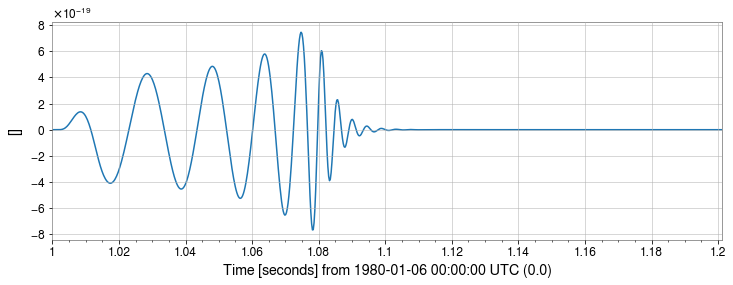

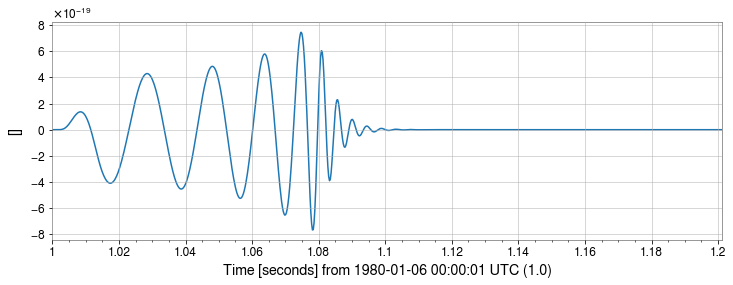

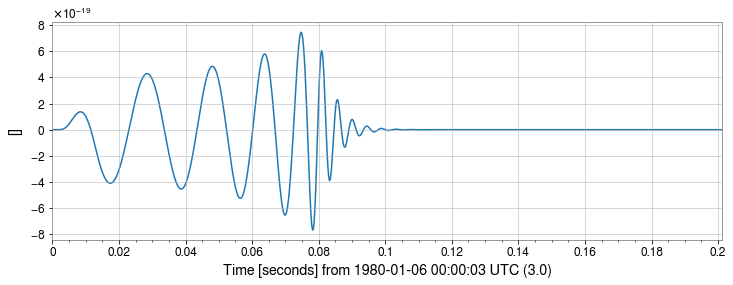

In [4]:
# This code cell demonstrates the changing of the start time of the bbh signal by modifying it's t0
# This method does not work for t0 >= 2 as shown below (raise an issue on gwpy)
# Find a fix or some alternative

bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))
bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)
print(bbh_two_mass_samples)

hp, hc = get_td_waveform(approximant='SEOBNRv2',
                                mass1=bbh_two_mass_samples[0][0],
                                mass2=bbh_two_mass_samples[0][1],
                                delta_t=1.0/4096,
                                f_lower=40)

signal = TimeSeries.from_pycbc(hp)
signal.plot()

signal = signal.taper()

signal.t0 = 0
signal.plot()

signal.t0 = 1
signal.plot()

signal.t0 = 2
signal.plot()

signal.t0 = 3
signal.plot()

[(36.81145989, 13.10419163)]


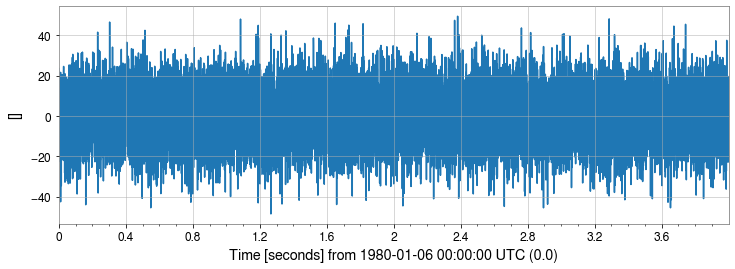

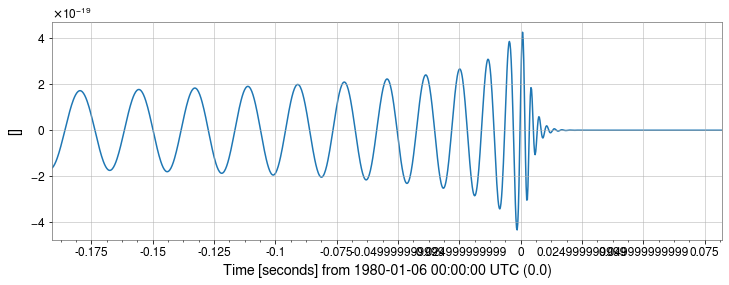

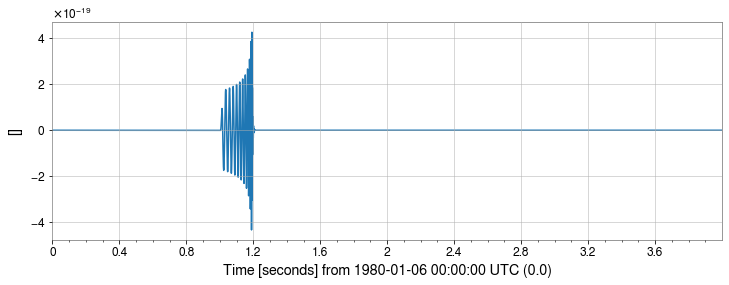

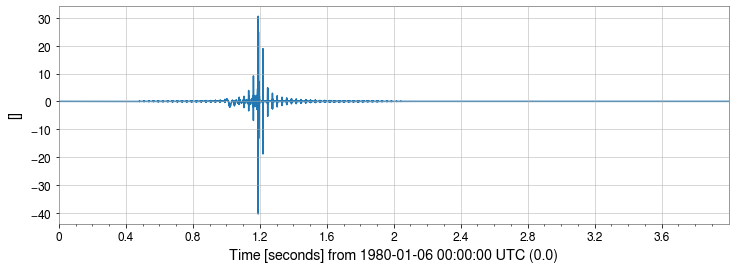

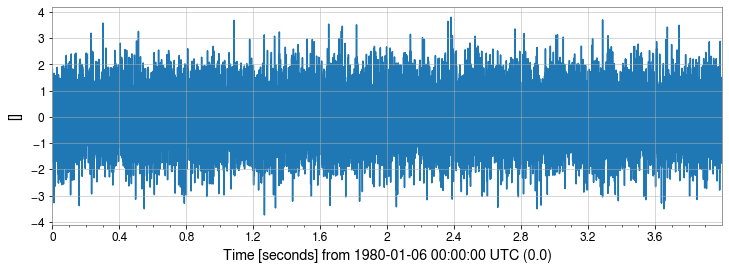

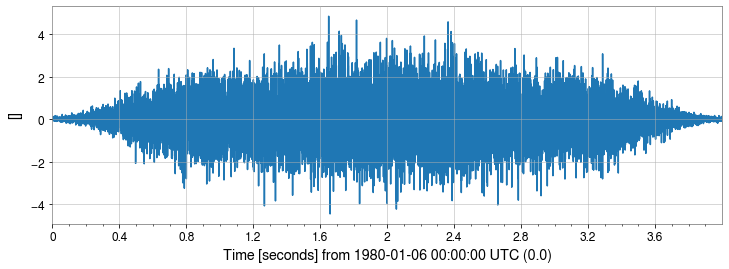

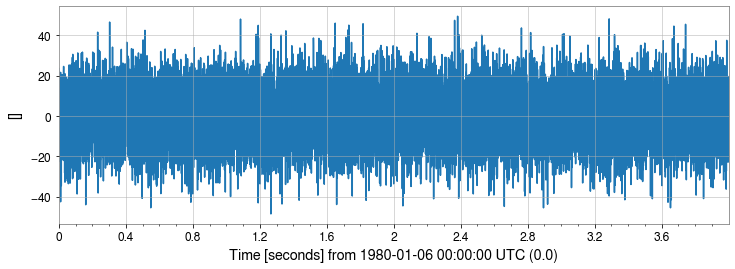

In [5]:
# This code cell demonstrates the method and effect of whitening on signals.

bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))
bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)
print(bbh_two_mass_samples)

hp, hc = get_td_waveform(approximant='SEOBNRv2',
                                mass1=bbh_two_mass_samples[0][0],
                                mass2=bbh_two_mass_samples[0][1],
                                delta_t=1.0/4096,
                                f_lower=40)

# plt.plot(hp.sample_times, hp, label='SEOBNRv2')

# plt.ylabel('Strain')
# plt.xlabel('Time (s)')
# plt.legend()
# plt.show()

signal = TimeSeries.from_pycbc(hp)
signal.plot()

signal = signal.taper()
signal.t0 = 1

noise = TimeSeries([0 for i in range(16384)], sample_rate=4096)
noise *= 1e-18
data = noise.inject(signal)
data.plot()
white = data.whiten()
white.plot()


noise = TimeSeries(np.random.normal(scale=1, size=16384), sample_rate=4096)    # did not understand clearly
noise.plot()    
noise *= 13
white1 = noise.whiten()
white1.plot()

data1 = noise.inject(white)
data1.plot()

[(18.14557292, 42.36965469)]


/home/hrishi/python-environments/env/lib/python3.6/site-packages/gwpy/types/series.py:1100: UserWarning: Series have overlapping xspan but their x-axis values are uniformly offset. Returning a copy of the original Series.
  warn('Series have overlapping xspan but their x-axis values are '


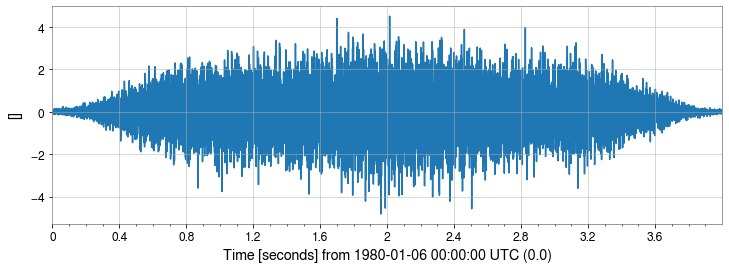

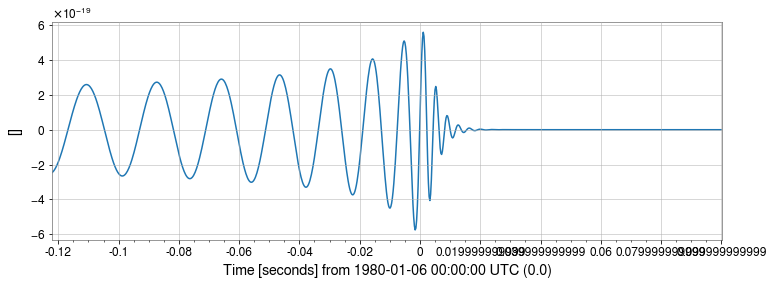

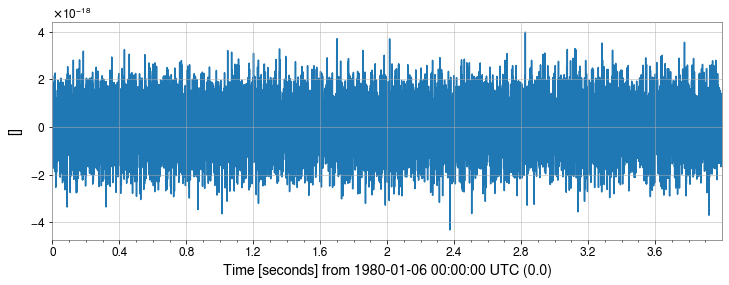

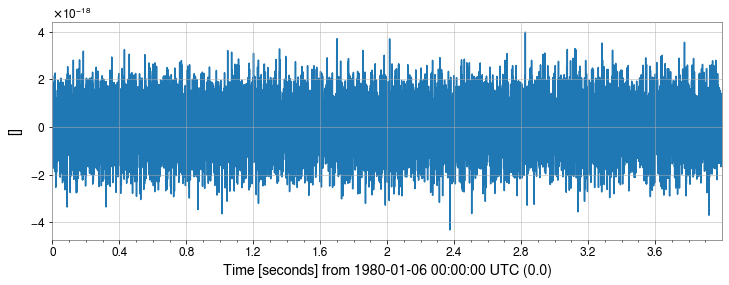

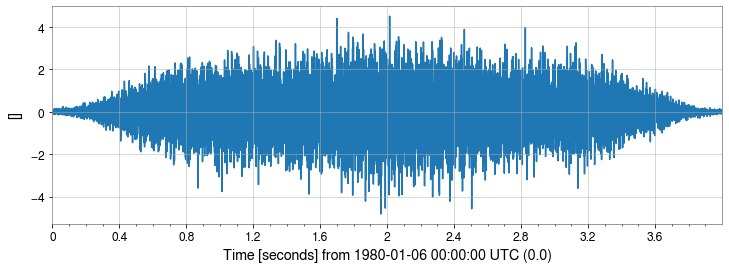

In [196]:
# This code cell demonstrates the effect of the change of the scale in the noise generation from 0.1 to 1
# Notice that changing the scale changes the amplitude of the noise
# With scale = 1, the signal is no longer visible in the noise whereas with scale = 0.1, the signal is clearly visible in the noise

bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)
print(bbh_two_mass_samples)

hp, hc = get_td_waveform(approximant='SEOBNRv2',
                                mass1=bbh_two_mass_samples[0][0],
                                mass2=bbh_two_mass_samples[0][1],
                                delta_t=1.0/4096,
                                f_lower=40)

# plt.plot(hp.sample_times, hp, label='SEOBNRv2')

# plt.ylabel('Strain')
# plt.xlabel('Time (s)')
# plt.legend()
# plt.show()

# hp.plot()

signal = TimeSeries.from_pycbc(hp)
signal.plot()

# signal = signal.taper()
# # signal.plot()
# signal.t0 = 1

noise = TimeSeries(np.random.normal(scale=1, size=16384), sample_rate=4096)
# noise.plot()    
noise *= 1e-18

noise.plot()
data = noise.inject(signal)
data.plot()

white = data.whiten()
white.plot()

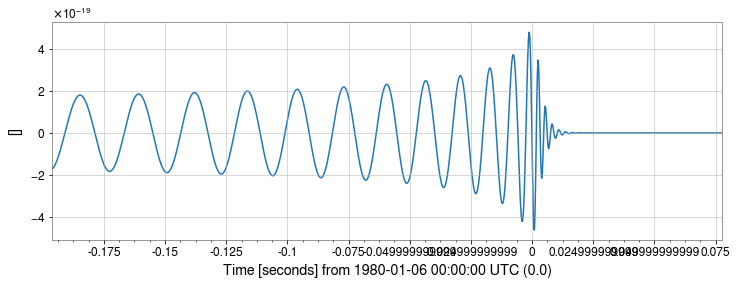

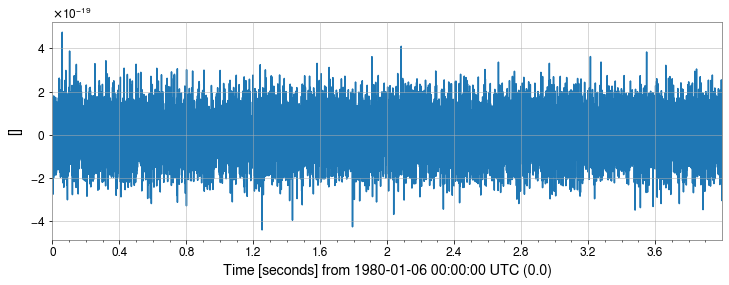

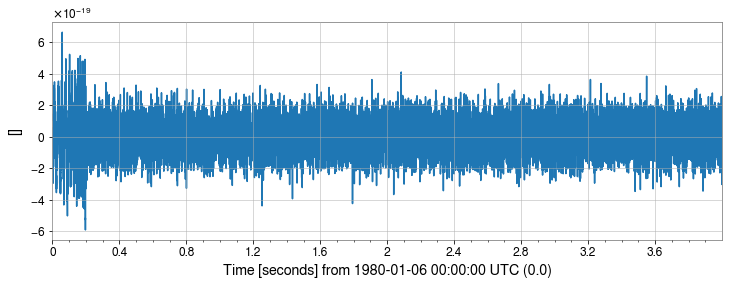

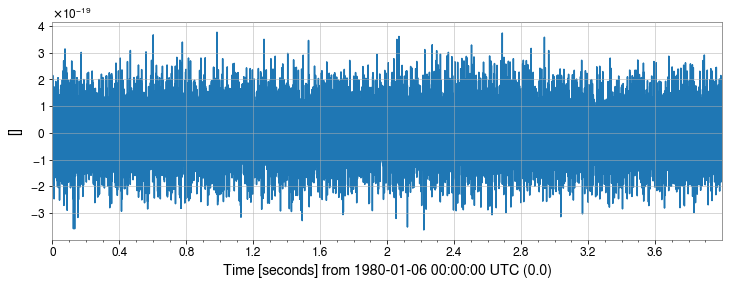

In [208]:
i = 4533

bbh = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/bbh_signal/bbh_4k_"+str(i)+".txt")
fig1 = bbh.plot()
# plt.plot(bbh, label='SEOBNRv2')

# plt.ylabel('Strain')
# plt.xlabel('Time (s)')
# plt.legend()
# plt.show()

noise = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/noise_templates/noise_4k_"+str(i)+".txt")
fig1 = noise.plot()

merged_bbh = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bbh_noise_signal/merged_noise_signal_"+str(i)+".txt")
fig1 = merged_bbh.plot()

merged_bns = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bns_noise_signal/bns_merged_noise_signal_"+str(0)+".txt")
fig1 = merged_bns.plot()




In [203]:
# This code cell is an attempt to calculate the SNR. For the source of this code, look at the SNR calculation tutorial
# website the bookmark folder

# high = merged_bbh.highpass(15)
psd = merged_bbh.psd(4, 2)

from pycbc.filter import matched_filter
snr = matched_filter(bbh, merged_bbh, psd=psd,
                     low_frequency_cutoff=15)
snrts = TimeSeries.from_pycbc(snr).abs()

TypeError: Can only convert a TimeSeries to a FrequencySeries

In [ ]:
plot = snrts.plot()
plot.show()

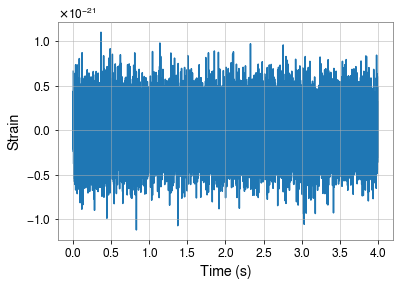

In [49]:
######## Another method of noise generation

import pycbc.noise
import pycbc.psd


# The color of the noise matches a PSD which you provide
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 4 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(4 / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)

plt.plot(ts.sample_times, ts)
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.show()

/home/hrishi/python-environments/env/lib/python3.6/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


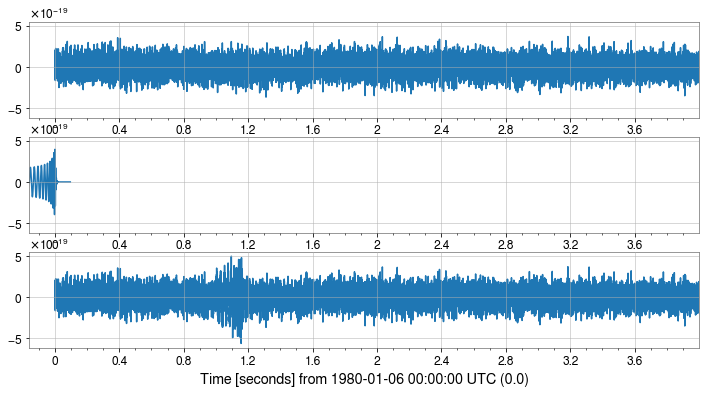

In [92]:
from gwpy.plot import Plot

plot = Plot(noise, bbh, merged_bbh, separate=True, sharex=True, sharey=True)
plot.gca().set_epoch(0)
plot.show()

In [109]:
# from numpy import random
# from gwpy.timeseries import TimeSeries
# noise = TimeSeries(random.normal(scale=.1, size=16384), sample_rate=4096)

# from astropy.utils.data import get_readable_fileobj
# url = ("https://www.gw-openscience.org/s/events/GW150914/P150914/"
#        "fig2-unfiltered-waveform-H.txt")
# with get_readable_fileobj(url) as f:
#     signal = TimeSeries.read(f, format='txt')
# signal.t0 = .5  # make sure this intersects with noise time samples

# print(signal)
print(random.normal(scale=.1, size=16384))

# signal = signal.taper()
# data = noise.inject(signal)

# plot = Plot(noise)
# plot.gca().set_epoch(0)
# plot.show()

[ 0.07824946 -0.09597957  0.03204696 ... -0.15411324 -0.08628236
 -0.13887345]


In [ ]:
#### DATASET DEBUGGING END
##################################################################################################################################
##################################################################################################################################

In [ ]:
#f1.close()

In [2]:
print("Generated Binary Mass Distributions for BNS")
# We can make pairs of distributions together, instead of apart.
bns_two_mass_distributions = distributions.Uniform(mass1=(1, 2),
                                               mass2=(1, 2))

bns_two_mass_samples = bns_two_mass_distributions.rvs(size=5000)

Generated Binary Mass Distributions for BNS


In [3]:
from pycbc import frame
#import random
#from numpy import random
print("Using Binary Mass Distributions to generate BNS waveforms")
print("Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...")
for i in tqdm(range(len(bns_two_mass_samples))):
    hp, hc = get_td_waveform(approximant="IMRPhenomPv2_NRTidal", 
                         mass1=bns_two_mass_samples[i][0],
                         mass2=bns_two_mass_samples[i][1],
                         delta_t=1.0/4096,
                         f_lower=40)            #change to 40   SEOBNRv2
    
    # noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=4096)
    # noise = noise*1e-18

    noise = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/noise_templates/noise_4k_"+str(i)+".txt")
    
    st = np.random.randint(0,2)
    #st = round(st,0)
    #hp.save("bbh_template_4k/bbh_4k_"+str(i+1)+".txt")
    #frame.write_frame("bbh_template_4k/bbh_4k_"+str(i+1)+".gwf", , hp)
    #pylab.plot(hp.sample_times, hp, label='H1')
    #pylab.plot(noise)
    signal = TimeSeries.from_pycbc(hp)
    
    # signal.write("new_data_4s_reduced_noise_no_abs/bns_signal/bns_signal_4s_bns_4k_"+str(i)+".txt")
    #noise.write("4s_new_generated_data/4s_noise_template_4k/4s_noise_4k_"+str(i+1)+".txt")
    #print(st)
    
    signal.t0 = st
    data = noise.inject(signal)
    #pylab.plot(data)
    data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bns_noise_signal/bns_merged_noise_signal_"+str(i)+".txt")

#pylab.ylabel('Strain')
#pylab.xlabel('Time (s)')
#pylab.legend()
#pylab.show()

Using Binary Mass Distributions to generate BNS waveforms
Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...


  0%|          | 0/5000 [00:00<?, ?it/s]

In [4]:
# MERGING NOISE + SIgnal Templates into single file


#for i in tqdm(range(5)):
path = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bns_noise_signal/"
files= os.listdir(path)
f = open('/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/Final_BNS_Merged_Noise_Signal_Reduced_No_ABS.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
##################################################################################################################################
##################################################################################################################################

In [ ]:

path_n = "4s_new_generated_data/4s_noise_template_4k/"


path_s = "4s_new_generated_data/4s_bns_template_4k/"

for i in tqdm(range(3)):
    s = TimeSeries.read(path_s+"4s_bns_4k_"+str(i+1)+".txt")
    n = TimeSeries.read(path_n+"4s_noise_4k_"+str(i+1)+".txt")
    st = np.random.randint(0,2)
    s.t0 = st
    data = n.inject(s)
    pylab.plot(n)
    pylab.plot(s)
        
    data.write("4s_new_generated_data/4s_merged_bns_noise_signal/4s_merged_noise_signal_"+str(i+1)+".txt")
pylab.show()

In [ ]:
#hp_bns, hc_bns = get_td_waveform(approximant="IMRPhenomPv2_NRTidal",
 #                        mass1=bns_two_mass_samples[3][0],
 #                        mass2=bns_two_mass_samples[3][1],
 #                        delta_t=1.0/4096,
 #                        f_lower=200)
#s = TimeSeries.read(path_s+"4s_bns_4k_"+str(1)+".txt")
n = TimeSeries.read(path_n+"4s_noise_4k_"+str(1)+".txt")
#pylab.plot(hp_bns.sample_times, hp_bns)
n= n*(1e-19)
pylab.scatter(n, range(16384))
pylab.show()

In [ ]:
hp_bns, hc_bns = get_td_waveform(approximant="IMRPhenomPv2_NRTidal",
                  mass1=2,
                   mass2=1.5,
                     delta_t=1.0/4096,
                      f_lower=40)
pylab.scatter(hp_bns.sample_times,hp_bns)

In [ ]:
s = TimeSeries.from_pycbc(hp_bns)
#pylab.plot(s)



In [ ]:
d = n.inject(s)
pylab.plot(d)

In [ ]:
pylab.scatter(d,range(16384))
#pylab.scatter(n*1e-18,range(16384))

In [ ]:
df = {}

files= "4s_new_generated_data/5000_4s_merged_bbh_noise_signal_no_abs/"
#data = [] # pd.concat takes a list of dataframes as an agrument
for i in range(5):
    #x=[]
    
    #print(csv)
    frame = pd.read_csv(files+"5000_4s_merged_noise_signal_3501"+str(i+1)+".txt",sep = ' ', header=None)
    
    #print(frame)
    #file_name = os.path.basename(csv)
    #print(file_name)
    #data.append(frame[:][1])
    x  = list(frame[:][1])
    #print(x)
    df['signal_noise_template_'+str(i+1)] = x
#print(df)

df1 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df.items() ]))
print(df1)
#df1_transposed = df1.T
#print(df1_transposed)
df1.to_csv("4s_new_generated_data/sample_signal_noise.csv", index=None)

In [ ]:
df = {}

files= "4s_new_generated_data/5000_4s_noise_template_4k_no_abs/"
#data = [] # pd.concat takes a list of dataframes as an agrument
for i in range(5):
    #x=[]
    
    #print(csv)
    frame = pd.read_csv(files+"5000_4s_noise_4k_350"+str(i+1)+".txt",sep = ' ', header=None)
    
    #print(frame)
    #file_name = os.path.basename(csv)
    #print(file_name)
    #data.append(frame[:][1])
    x  = list(frame[:][1])
    #print(x)
    df['pure_noise_template_'+str(i+1)] = x
#print(df)

df1 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df.items() ]))
print(df1)
#df1= df1*1e-17
print(df1)
#df1_transposed = df1.T
#print(df1_transposed)
df1.to_csv("4s_new_generated_data/sample_pure_noise.csv", index=None)

In [ ]:
df = {}

files= "4s_new_generated_data/5000_4s_bbh_template_4k_no_abs/"
#data = [] # pd.concat takes a list of dataframes as an agrument
for i in range(5):
    #x=[]
    
    #print(csv)
    frame = pd.read_csv(files+"5000_4s_bbh_4k_350"+str(i+1)+".txt",sep = ' ', header=None)
    
    #print(frame)
    #file_name = os.path.basename(csv)
    #print(file_name)
    #data.append(frame[:][1])
    x  = list(frame[:][1])
    #print(x)
    df['only_signal_template_'+str(i+1)] = x
#print(df)

df1 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df.items() ]))
print(df1)

#df1_transposed = df1.T
#print(df1_transposed)
df1.to_csv("4s_new_generated_data/sample_signal.csv", index=None)

In [ ]:
df = pd.read_csv("4s_new_generated_data/sample_pure_noise.csv", header=None)
print(df.shape)

In [ ]:
#print(df)
df = df.iloc[0: , :]
print(df[0])

plt.plot(df[0])
plt.show()

In [ ]:
df = pd.read_csv("4s_new_generated_data/5000_4s_bbh_template_4k_no_abs/5000_4s_bbh_4k_3501.txt",sep=' ', header=None)
print(df)
